# Telco Customer Churn - Exploratory Data Analysis
<br>
Customer churn is the percentage of customers that stopped using the company's product or service during a certain time frame. It can calculate churn rate by dividing the number of customers the company lost during that time period, by the number of customers the company had at the beginning of that time period. it's important because it costs more to acquire new customers than it does to retain existing customers.

## Table of Contents

- <a href='#1'>1. Data Overview</a>
- <a href='#2'>2. EDA (Exploratory Data Analysis)</a>
    - <a href='#2-1'>2.1 Data Preprocessing (for EDA)</a>
        - <a href='#2-1-1'>2.1.1 Memory Optimization</a>
        - <a href='#2-1-2'>2.1.2 Data Cleaning</a>
    - <a href='#2-2'>2.2 Target/Dependent feature</a>
        - <a href='#2-2-1'>2.2.1 Churn (Binary Feature)</a>
    - <a href='#2-3'>2.3 Numerical feature</a>
        - <a href='#2-3-1'>2.3.1 Tenure (Continuous Feature)</a>
        - <a href='#2-3-2'>2.3.2 Monthly Charges (Continuous Feature)</a>
        - <a href='#2-3-3'>2.3.3 Total Charges (Continuous Feature)</a>
    - <a href='#2-4'>2.4 Categorical feature</a>
        - <a href='#2-4-1'>2.4.1 Gender (Binary Feature)</a>
        - <a href='#2-4-2'>2.4.2 SeniorCitizen (Binary Feature)</a>
        - <a href='#2-4-3'>2.4.3 Partner (Binary Feature)</a>
        - <a href='#2-4-4'>2.4.4 Dependents (Binary Feature)</a>
        - <a href='#2-4-5'>2.4.5 Phone Service (Binary Feature)</a>
        - <a href='#2-4-6'>2.4.6 Multiple Lines (Binary Feature)</a>
        - <a href='#2-4-7'>2.4.7 Internet Service (Nominal Feature)</a>
        - <a href='#2-4-8'>2.4.8 Online Security (Binary Feature)</a>
        - <a href='#2-4-9'>2.4.9 Online Backup (Binary Feature)</a>
        - <a href='#2-4-10'>2.4.10 Device Protection (Binary Feature)</a>
        - <a href='#2-4-11'>2.4.11 Tech Support (Binary Feature)</a>
        - <a href='#2-4-12'>2.4.12 Streaming TV (Binary Feature)</a>
        - <a href='#2-4-13'>2.4.13 Streaming Movies (Binary Feature)</a>
        - <a href='#2-4-14'>2.4.14 Contract (Nominal Feature)</a>
        - <a href='#2-4-15'>2.4.15 Paperless Billing (Binary Feature)</a>
        - <a href='#2-4-16'>2.4.16 Payment Method (Nominal Feature)</a>
- <a href='#3'>3. Predictive Models</a>
    - <a href='#3-1'>3.1 Split The Data</a>
    - <a href='#3-2'>3.2 Data Preprocessing</a>
        - <a href='#3-2-1'>3.2.1 Feature Engineering</a>
        - <a href='#3-2-2'>3.2.2 Data Cleaning</a>
    - <a href='#3-3'>3.3 Correlation Between The Features</a>

# <a id='1'>1. Pre-Processing Data</a>

### <a id='1-1'>1.1 Define The Data</a>

In [1]:
import numpy as np
from numpy import mean
from numpy import std
from numpy import absolute
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import plotly.express as px
from scipy import stats
from typing import List
import statsmodels.api as sm
import os

#show all columns
pd.set_option('display.max_columns', None)

In [2]:
print(os.listdir('../project/Telco Customer Churn'))

['WA_Fn-UseC_-Telco-Customer-Churn.csv']


In [3]:
df = pd.read_csv('../project/Telco Customer Churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
df.sample(7)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2316,9367-OIUXP,Male,0,No,No,4,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.70,73.05,No
6647,8722-PRFDV,Female,0,Yes,Yes,71,Yes,No,DSL,Yes,No,Yes,No,Yes,Yes,Two year,No,Credit card (automatic),77.55,5574.35,No
2566,3227-WLKLI,Female,0,Yes,Yes,65,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),91.55,5963.95,No
5917,5144-PQCDZ,Male,0,No,No,4,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.95,59.25,No
625,3003-CMDUU,Female,0,Yes,No,25,Yes,No,Fiber optic,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,95.15,2395.7,No
5918,8514-VZHEB,Male,0,Yes,Yes,59,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.50,1147.85,No
179,3712-PKXZA,Male,0,Yes,No,61,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Credit card (automatic),20.55,1252,No


In [5]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

#Overview
* `customerID` is the unique id of the row and it doesn't have any effect on target
* `gender` Whether the customer is a male or a female
* `SeniorCitizen` Whether the customer is a senior citizen or not (1, 0)
* `Partner` Whether the customer has a partner or not (Yes, No)
* `Dependents` Whether the customer has dependents or not (Yes, No)
* `Tenure` Number of months the customer has stayed with the company
* `PhoneService` Whether the customer has a phone service or not (Yes, No)
* `MultipleLines` Whether the customer has multiple lines or not (Yes, No, No phone service)
* `InternetService` Customer’s internet service provider (DSL, Fiber optic, No)
* `OnlineSecurity` Whether the customer has online security or not (Yes, No, No internet service)
* `OnlineBackup` Whether the customer has online backup or not (Yes, No, No internet service)
* `DeviceProtection` Whether the customer has device protection or not (Yes, No, No internet service)
* `TechSupport` Whether the customer has tech support or not (Yes, No, No internet service)
* `StreamingTV` Whether the customer has streaming TV or not (Yes, No, No internet service)
* `StreamingMovies` Whether the customer has streaming movies or not (Yes, No, No internet service)
* `Contract` The contract term of the customer (Month-to-month, One year, Two year)
* `PaperlessBilling` Whether the customer has paperless billing or not (Yes, No)
* `PaymentMethod` The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* `MonthlyCharges` The amount charged to the customer monthly
* `TotalCharges` The total amount charged to the customer
* `Churn` Whether the customer churned or not (Yes or No)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# <a id='2'>2. Exploratory Data Analysis</a>

In [7]:
#Assign new dataframe for EDA
df1 = df.copy()

### <a id='2-1-1'>2.1.1 Memory Optimization</a>

In [8]:
def optimize_floats(df1: pd.DataFrame) -> pd.DataFrame:
    floats = df1.select_dtypes(include=['float64']).columns.tolist()
    df1[floats] = df1[floats].apply(pd.to_numeric, downcast='float')
    return df1

def optimize_ints(df1: pd.DataFrame) -> pd.DataFrame:
    ints = df1.select_dtypes(include=['int64']).columns.tolist()
    df1[ints] = df1[ints].apply(pd.to_numeric, downcast='integer')
    return df1

def optimize_objects(df1: pd.DataFrame, datetime_features: List[str]) -> pd.DataFrame:
    for col in df1.select_dtypes(include=['object']):
        if col not in datetime_features:
            num_unique_values = len(df1[col].unique())
            num_total_values = len(df1[col])
            if float(num_unique_values) / num_total_values < 0.5:
                df1[col] = df1[col].astype('category')
        else:
            df1[col] = pd.to_datetime(df1[col])
    return df1

def optimize(df1: pd.DataFrame, datetime_features: List[str] = []):
    return optimize_floats(optimize_ints(optimize_objects(df1, datetime_features)))

df1 = optimize(df1)

# Converting Senior Citizen to a categorical data type.
df1['SeniorCitizen'] = df1['SeniorCitizen'].astype('category')

# Converting Total Charges to a numerical data type.
df1.TotalCharges = pd.to_numeric(df1.TotalCharges, errors='coerce')

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   category
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   int8    
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

### <a id='2-1-2'>2.1.2 Data Cleaning</a>

In [9]:
#Handling missing value
missing = df1.isnull().sum().sort_values(ascending = False)
non_missing = df1.notnull().sum()
percent = (df1.isnull().sum()/df1.isnull().count()*100).sort_values(ascending = False)
dtypes = df1.dtypes
missing_df = pd.concat([missing, non_missing, percent, dtypes], axis=1, keys=['Missing', 'Non-Missing', 'Percent', 'Dtypes'])
missing_df

,Missing,Non-Missing,Percent,Dtypes
TotalCharges,11,7032,0.156183,float64
customerID,0,7043,0.000000,object
DeviceProtection,0,7043,0.000000,category
MonthlyCharges,0,7043,0.000000,float32
PaymentMethod,0,7043,0.000000,category
PaperlessBilling,0,7043,0.000000,category
Contract,0,7043,0.000000,category
StreamingMovies,0,7043,0.000000,category
StreamingTV,0,7043,0.000000,category
TechSupport,0,7043,0.000000,category


In [10]:
df1[pd.to_numeric(df1.TotalCharges, errors='coerce').isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.549999,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.250000,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.849998,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.750000,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.049999,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.850000,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.350000,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.000000,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.700001,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.349998,NaN,No


In [11]:
# Replacing the missing value in Total Charges feature
median_value=df1['TotalCharges'].median()
df1['TotalCharges'].fillna(median_value,inplace=True)
    
print("{}: {} missing of total {}, {}% missing value".format('TotalCharges', df1['TotalCharges'].isnull().sum(), df1['TotalCharges'].count(), np.around(df1['TotalCharges'].isnull().mean()*100,4)))

TotalCharges: 0 missing of total 7043, 0.0% missing value


In [12]:
#Unique values from all columns
df1_cat=[feature for feature in df1.select_dtypes(include=['category', 'bool'])]

def print_unique_cat_values(df1_cat):
    for column in df1_cat:
        print(f'{column} : {df1[column].unique()} \n')

print_unique_cat_values(df1_cat)

gender : ['Female', 'Male']
Categories (2, object): ['Female', 'Male'] 

SeniorCitizen : [0, 1]
Categories (2, int64): [0, 1] 

Partner : ['Yes', 'No']
Categories (2, object): ['No', 'Yes'] 

Dependents : ['No', 'Yes']
Categories (2, object): ['No', 'Yes'] 

PhoneService : ['No', 'Yes']
Categories (2, object): ['No', 'Yes'] 

MultipleLines : ['No phone service', 'No', 'Yes']
Categories (3, object): ['No', 'No phone service', 'Yes'] 

InternetService : ['DSL', 'Fiber optic', 'No']
Categories (3, object): ['DSL', 'Fiber optic', 'No'] 

OnlineSecurity : ['No', 'Yes', 'No internet service']
Categories (3, object): ['No', 'No internet service', 'Yes'] 

OnlineBackup : ['Yes', 'No', 'No internet service']
Categories (3, object): ['No', 'No internet service', 'Yes'] 

DeviceProtection : ['No', 'Yes', 'No internet service']
Categories (3, object): ['No', 'No internet service', 'Yes'] 

TechSupport : ['No', 'Yes', 'No internet service']
Categories (3, object): ['No', 'No internet service', 'Yes

In [13]:
#Fix inconsistent data entry
df1.replace('No phone service', 'No', inplace=True)
df1.replace('No internet service', 'No', inplace=True)

In [14]:
print(df1.MultipleLines.unique())
print(df1.OnlineSecurity.unique())

['No', 'Yes']
Categories (2, object): ['No', 'Yes']
['No', 'Yes']
Categories (2, object): ['No', 'Yes']


<AxesSubplot:>

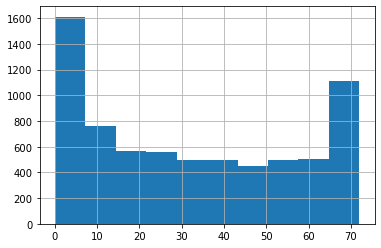

In [15]:
df1.tenure.hist()

In [16]:
tenure_mean = df1.tenure.mean()
tenure_mean

32.37114865824223

In [17]:
tenure_std = df1.tenure.std()
tenure_std

24.55948102309446

In [18]:
tenure_mean - 3*tenure_std

-41.30729441104115

In [19]:
tenure_mean + 3*tenure_std

106.04959172752561

### <a id='2-2'>2.2 Target/Dependent feature</a>

#### <a id='2-2-1'>2.2.1 Churn (Binary Feature)</a>

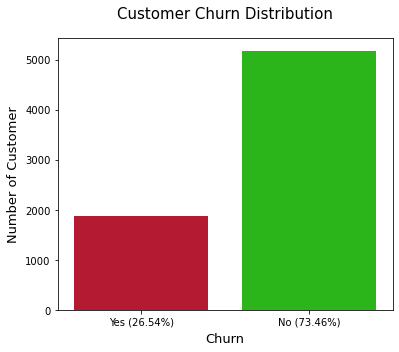



1,869 of 7,043 customers did churn, 26.54% of total customers.
5,174 of 7,043 customers did not churn, 73.46% of total cusomers.


In [20]:
churn_yes = df1['Churn'].value_counts()[1]
churn_no = df1['Churn'].value_counts()[0]
churn_yes_per = churn_yes / df1.shape[0] * 100
churn_no_per = churn_no / df1.shape[0] * 100


#Visualization
with sns.color_palette(['#cf0022', '#18cf00']):
    plt.figure(figsize=(6, 5))
    sns.countplot(x=df1['Churn'], order=['Yes', 'No'])
    plt.xlabel('Churn', size=13, labelpad=5)
    plt.ylabel('Number of Customer', size=13, labelpad=5)
    plt.xticks((1, 0), ['No ({0:.2f}%)'.format(churn_no_per), 'Yes ({0:.2f}%)'.format(churn_yes_per)])
    plt.title('Customer Churn Distribution', size=15, y=1.05)

plt.show()


#Summary
print('\n\n{:,} of {:,} customers did churn, {:.2f}% of total customers.'.format(churn_yes, df1.shape[0], churn_yes_per))
print('{:,} of {:,} customers did not churn, {:.2f}% of total cusomers.'.format(churn_no, df1.shape[0], churn_no_per))

### <a id='2-3'>2.3 Numerical feature</a>

#### <a id='2-3-1'>2.3.1 Tenure (Continuous Feature)</a>

In [21]:
#Define the data
tc_y = df1[df1.Churn=='Yes'].tenure.reset_index(drop=True)
tc_n = df1[df1.Churn=='No'].tenure.reset_index(drop=True)
tc = pd.concat([df1.tenure, tc_y, tc_n], axis=1)
tc.columns = ['tenure', 'churn_yes', 'churn_no']

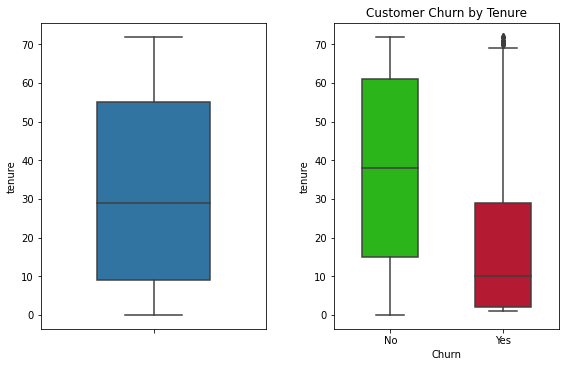

,tenure,churn_yes,churn_no
count,7043.000000,1869.000000,5174.000000
mean,32.371149,17.979133,37.569965
std,24.559481,19.531123,24.113777
min,0.000000,1.000000,0.000000
25%,9.000000,2.000000,15.000000
50%,29.000000,10.000000,38.000000
75%,55.000000,29.000000,61.000000
max,72.000000,72.000000,72.000000


In [22]:
#Boxes Plot
fig, axs = plt.subplots(1, 2, figsize=(8, 5))

ax = sns.boxplot(y=df1.tenure, width=0.5, ax=axs[0])

ax = sns.boxplot(x='Churn', y='tenure', data=df1, width=0.5, palette=(['#18cf00', '#cf0022']), ax=axs[1]).set_title('Customer Churn by Tenure')

fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.3)

plt.show()


#Descriptive Statistics
display(tc.describe())

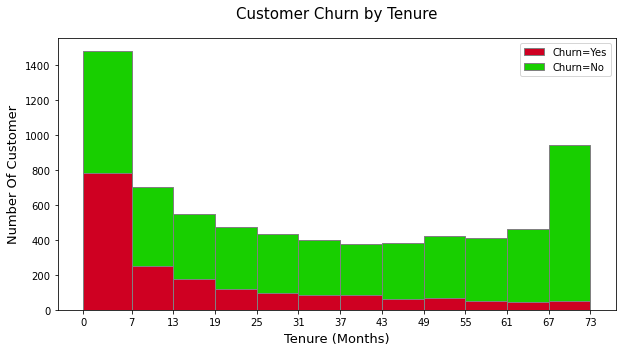

,0-6,7-12,13-18,19-24,25-30,31-36,37-42,43-48,49-54,55-60,61-66,67-72
churn_no,697,452,371,359,337,315,296,321,352,360,420,894
churn_yes,784,253,177,117,94,86,83,62,68,52,43,50
total_cust,1481,705,548,476,431,401,379,383,420,412,463,944
point_difference,-87,199,194,242,243,229,213,259,284,308,377,844
churn_no_perc,13%,9%,7%,7%,7%,6%,6%,6%,7%,7%,8%,17%
churn_yes_perc,42%,14%,9%,6%,5%,5%,4%,3%,4%,3%,2%,3%


In [23]:
#Histogram
with sns.color_palette(['#cf0022', '#18cf00']):
    fig, ax = plt.subplots(figsize=(10,5))
    counts, bins, patches = ax.hist([tc_y, tc_n], bins=(0, 7, 13, 19, 25, 31, 37, 43, 49, 55, 61, 67, 73), edgecolor='gray', stacked=True)
    ax.set_xticks(bins)
    plt.xlabel('Tenure (Months)', size=13, labelpad=5)
    plt.ylabel('Number Of Customer', size=13, labelpad=5)
    plt.title('Customer Churn by Tenure', size=15, y=1.05)
    plt.legend(['Churn=Yes','Churn=No'])

plt.show()


#Table
tc_yr = tc_y.replace(range(0, 7), '0-6').replace(range(7, 13), '7-12').replace(range(13, 19), '13-18').replace(range(19, 25), '19-24').replace(range(25, 31), '25-30').replace(range(31, 37), '31-36').replace(range(37, 43), '37-42').replace(range(43, 49), '43-48').replace(range(49, 55), '49-54').replace(range(55, 61), '55-60').replace(range(61, 67), '61-66').replace(range(67, 73), '67-72')
tc_nr = tc_n.replace(range(0, 7), '0-6').replace(range(7, 13), '7-12').replace(range(13, 19), '13-18').replace(range(19, 25), '19-24').replace(range(25, 31), '25-30').replace(range(31, 37), '31-36').replace(range(37, 43), '37-42').replace(range(43, 49), '43-48').replace(range(49, 55), '49-54').replace(range(55, 61), '55-60').replace(range(61, 67), '61-66').replace(range(67, 73), '67-72')

tc0 = pd.concat([tc_yr, tc_nr], axis=1)
tc0.columns = ['churn_yes', 'churn_no']

churn_index = ['0-6', '7-12', '13-18', '19-24', '25-30', '31-36', '37-42', '43-48', '49-54', '55-60', '61-66', '67-72']
tc_yr1 = tc0['churn_yes'].value_counts().reindex(churn_index).to_frame()
tc_nr1 = tc0['churn_no'].value_counts().reindex(churn_index).to_frame()

tc_table = pd.concat([tc_yr1, tc_nr1], axis=1)

tc_table['total_cust'] = (tc_table['churn_yes'] + tc_table['churn_no'])
tc_table['point_difference'] = tc_table['churn_no'] - tc_table['churn_yes']
tc_table['churn_no_perc'] = (tc_table['churn_no']  / tc_table['churn_no'].sum())
tc_table['churn_no_perc'] = tc_table['churn_no_perc'].map("{:.0%}".format)
tc_table['churn_yes_perc'] = (tc_table['churn_yes']  / tc_table['churn_yes'].sum())
tc_table['churn_yes_perc'] = tc_table['churn_yes_perc'].map("{:.0%}".format)

table_index = ['churn_no', 'churn_yes', 'total_cust', 'point_difference', 'churn_no_perc', 'churn_yes_perc']

tc_table = tc_table.transpose().reindex(table_index)

display(tc_table)

In [24]:
#Summary
print('- Highest customer tenure on 0-6 months / 0-0.5 year ({} of {} customers, {:.1%} of total customer)'.format(tc_table.loc['total_cust', '0-6'], tc_table.loc['total_cust'].sum(), tc_table.loc['total_cust', '0-6'] / tc_table.loc['total_cust'].sum()))

print('\n- Lowest customer tenure on 37-42 months / 3-3.5 years ({} of {} customers, {:.1%} of total customer)'.format(tc_table.loc['total_cust', '37-42'], tc_table.loc['total_cust'].sum(), tc_table.loc['total_cust', '37-42'] / tc_table.loc['total_cust'].sum()))

print('\n- Highest customer did churn on 0-6 months / 0-0.5 year tenure ({} of {} customers, {:.1%} of total customer did churn)'.format(tc_table.loc['churn_yes', '0-6'], tc_table.loc['churn_yes'].sum(), tc_table.loc['churn_yes', '0-6'] / tc_table.loc['churn_yes'].sum()))

print('\n- Highest customer did not churn on 67-72 months / 5.5-6 years tenure ({} of {} customers, {:.1%} of total customer did not churn)'.format(tc_table.loc['churn_no', '67-72'], tc_table.loc['churn_no'].sum(), tc_table.loc['churn_no', '67-72'] / tc_table.loc['churn_no'].sum()))

print('\n- The customer did churn average is on 13-18 months / 1-1.5 year tenure ({:.1f}) while median is on 7-12 months / 0.5-1 year tenure ({:.1f}).'.format(tc_y.mean(), tc_y.median()))

print('\n- The customer did not churn average is on 37-42 months / 3-3.5 years tenure ({:.1f}) while median is on is on 37-42 months / 3-3.5 years tenure({:.1f}).'.format(tc_n.mean(), tc_n.median()))

- Highest customer tenure on 0-6 months / 0-0.5 year (1481 of 7043 customers, 21.0% of total customer)

- Lowest customer tenure on 37-42 months / 3-3.5 years (379 of 7043 customers, 5.4% of total customer)

- Highest customer did churn on 0-6 months / 0-0.5 year tenure (784 of 1869 customers, 41.9% of total customer did churn)

- Highest customer did not churn on 67-72 months / 5.5-6 years tenure (894 of 5174 customers, 17.3% of total customer did not churn)

- The customer did churn average is on 13-18 months / 1-1.5 year tenure (18.0) while median is on 7-12 months / 0.5-1 year tenure (10.0).

- The customer did not churn average is on 37-42 months / 3-3.5 years tenure (37.6) while median is on is on 37-42 months / 3-3.5 years tenure(38.0).


#### <a id='2-3-2'>2.3.2 Monthly Charges (Continuous Feature)</a>

In [25]:
#Define the data
mcc_y = df1[df1.Churn=='Yes'].MonthlyCharges.reset_index(drop=True).round().astype(int)
mcc_n = df1[df1.Churn=='No'].MonthlyCharges.reset_index(drop=True).round().astype(int)
mcc = pd.concat([df1.MonthlyCharges, mcc_y, mcc_n], axis=1)
mcc.columns = ['MonthlyCharges', 'churn_yes', 'churn_no']

In [26]:
mcc

,MonthlyCharges,churn_yes,churn_no
0,29.850000,54.0,30.0
1,56.950001,71.0,57.0
2,53.849998,100.0,42.0
3,42.299999,105.0,89.0
4,70.699997,104.0,30.0
...,...,...,...
7038,84.800003,NaN,NaN
7039,103.199997,NaN,NaN
7040,29.600000,NaN,NaN
7041,74.400002,NaN,NaN


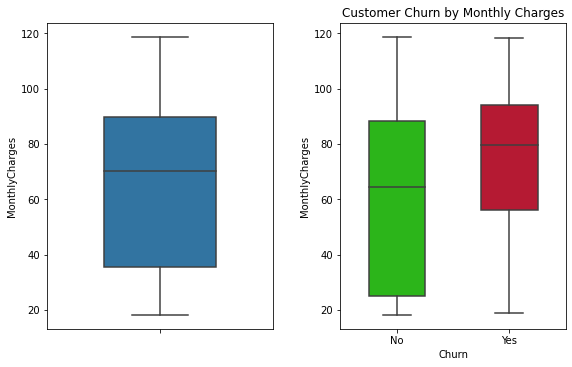

,MonthlyCharges,churn_yes,churn_no
count,7043.000000,1869.000000,5174.000000
mean,64.761826,74.428571,61.265752
std,30.089973,24.670589,31.094966
min,18.250000,19.000000,18.000000
25%,35.500000,56.000000,25.000000
50%,70.349998,80.000000,64.000000
75%,89.849998,94.000000,88.000000
max,118.750000,118.000000,119.000000


In [27]:
#Boxes Plot
fig, axs = plt.subplots(1, 2, figsize=(8, 5))

ax = sns.boxplot(y=df1.MonthlyCharges, width=0.5, ax=axs[0])

ax = sns.boxplot(x='Churn', y='MonthlyCharges', data=df1, width=0.5, palette=(['#18cf00', '#cf0022']), ax=axs[1]).set_title('Customer Churn by Monthly Charges')

fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.3)

plt.show()


#Descriptive Statistics
display(mcc.describe())

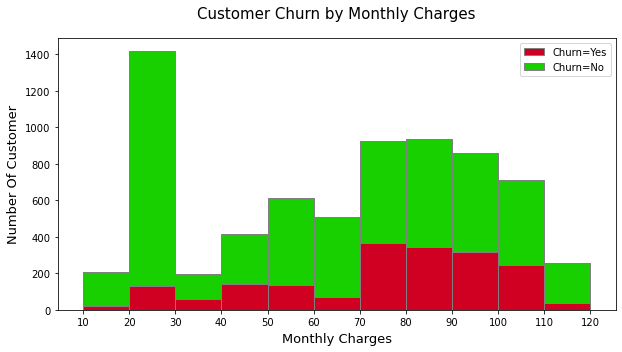

,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,90-99,100-109,110-119
churn_no,189,1285,139,277,479,435,559,589,541,465,216
churn_yes,19,133,58,139,135,72,366,344,319,246,38
total_cust,208,1418,197,416,614,507,925,933,860,711,254
point_difference,170,1152,81,138,344,363,193,245,222,219,178
churn_no_perc,4%,25%,3%,5%,9%,8%,11%,11%,10%,9%,4%
churn_yes_perc,1%,7%,3%,7%,7%,4%,20%,18%,17%,13%,2%


In [28]:
#Histogram
with sns.color_palette(['#cf0022', '#18cf00']):
    fig, ax = plt.subplots(figsize=(10,5))
    counts, bins, patches = ax.hist([mcc_y, mcc_n], bins=range(10, 121, 10), edgecolor='gray', stacked=True)
    ax.set_xticks(bins)
    plt.xlabel('Monthly Charges', size=13, labelpad=5)
    plt.ylabel('Number Of Customer', size=13, labelpad=5)
    plt.title('Customer Churn by Monthly Charges', size=15, y=1.05)
    plt.legend(['Churn=Yes','Churn=No'])

plt.show()


#Table
mcc_y0 = mcc_y.replace(range(10, 20), '10-19').replace(range(20, 30), '20-29').replace(range(30, 40), '30-39').replace(range(40, 50), '40-49').replace(range(50, 60), '50-59').replace(range(60, 70), '60-69').replace(range(70, 80), '70-79').replace(range(80, 90), '80-89').replace(range(90, 100), '90-99').replace(range(100, 110), '100-109').replace(range(110, 120), '110-119')
mcc_n0 = mcc_n.replace(range(10, 20), '10-19').replace(range(20, 30), '20-29').replace(range(30, 40), '30-39').replace(range(40, 50), '40-49').replace(range(50, 60), '50-59').replace(range(60, 70), '60-69').replace(range(70, 80), '70-79').replace(range(80, 90), '80-89').replace(range(90, 100), '90-99').replace(range(100, 110), '100-109').replace(range(110, 120), '110-119')

mcc0 = pd.concat([mcc_y0, mcc_n0], axis=1)
mcc0.columns = ['churn_yes', 'churn_no']

mcc_index = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100-109', '110-119']
mcc_y1 = mcc0['churn_yes'].value_counts().reindex(mcc_index).to_frame()
mcc_n1 = mcc0['churn_no'].value_counts().reindex(mcc_index).to_frame()

mcc_table = pd.concat([mcc_y1, mcc_n1], axis=1)
mcc_table['total_cust'] = (mcc_table['churn_yes'] + mcc_table['churn_no'])
mcc_table['point_difference'] = mcc_table['churn_no'] - mcc_table['churn_yes']
mcc_table['churn_no_perc'] = (mcc_table['churn_no']  / mcc_table['churn_no'].sum())
mcc_table['churn_no_perc'] = mcc_table['churn_no_perc'].map("{:.0%}".format)
mcc_table['churn_yes_perc'] = (mcc_table['churn_yes']  / mcc_table['churn_yes'].sum())
mcc_table['churn_yes_perc'] = mcc_table['churn_yes_perc'].map("{:.0%}".format)

mcc_table_index = ['churn_no', 'churn_yes', 'total_cust', 'point_difference', 'churn_no_perc', 'churn_yes_perc']
mcc_table = mcc_table.transpose().reindex(mcc_table_index)

display(mcc_table)

In [29]:
#summary
print('- Highest customer on 20-29 monthly charges ({} of {} customers, {:.1%} of total customer)'.format(mcc_table.loc['total_cust', '20-29'], mcc_table.loc['total_cust'].sum(), mcc_table.loc['total_cust', '20-29'] / mcc_table.loc['total_cust'].sum()))

print('\n- Lowest customer on 30-39 monthly charges ({} of {} customers, {:.1%} of total customer)'.format(mcc_table.loc['total_cust', '30-39'], mcc_table.loc['total_cust'].sum(), mcc_table.loc['total_cust', '30-39'] / mcc_table.loc['total_cust'].sum()))

print('\n- Highest customer did churn on 70-79 monthly charges ({} of {} customers, {:.1%} of total customer did churn)'.format(mcc_table.loc['churn_yes', '70-79'], mcc_table.loc['churn_yes'].sum(), mcc_table.loc['churn_yes', '70-79'] / mcc_table.loc['churn_yes'].sum()))

print('\n- Highest customer did not churn on 20-29 monthly charges ({} of {} customers, {:.1%} of total customer did not churn)'.format(mcc_table.loc['churn_no', '20-29'], mcc_table.loc['churn_no'].sum(), mcc_table.loc['churn_no', '20-29'] / mcc_table.loc['churn_no'].sum()))

print('\n- The customer did churn average is on 70-79 monthly charges ({:.1f}) while median is on 80-89 monthly charges ({:.1f}).'.format(mcc_y.mean(), mcc_y.median()))

print('\n- The customer did not churn average is on 60-69 monthly charges ({:.1f}) while median is on is on 60-69 monthly charges ({:.1f}).'.format(mcc_n.mean(), mcc_n.median()))

- Highest customer on 20-29 monthly charges (1418 of 7043 customers, 20.1% of total customer)

- Lowest customer on 30-39 monthly charges (197 of 7043 customers, 2.8% of total customer)

- Highest customer did churn on 70-79 monthly charges (366 of 1869 customers, 19.6% of total customer did churn)

- Highest customer did not churn on 20-29 monthly charges (1285 of 5174 customers, 24.8% of total customer did not churn)

- The customer did churn average is on 70-79 monthly charges (74.4) while median is on 80-89 monthly charges (80.0).

- The customer did not churn average is on 60-69 monthly charges (61.3) while median is on is on 60-69 monthly charges (64.0).


#### <a id='2-3-3'>2.3.3 Total Charges (Continuous Feature)</a>

In [30]:
#Define the data
tcc_n = df1[df1.Churn=='No'].TotalCharges.reset_index(drop=True).round().astype(int)
tcc_y = df1[df1.Churn=='Yes'].TotalCharges.reset_index(drop=True).round().astype(int)
tcc = pd.concat([df1.TotalCharges, tcc_y, tcc_n], axis=1)
tcc.columns = ['TotalCharges', 'churn_yes', 'churn_no']

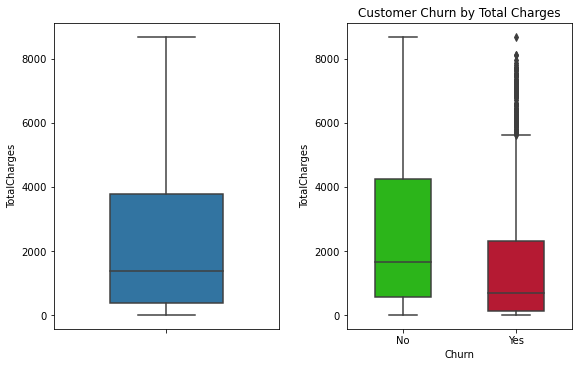

,TotalCharges,churn_yes,churn_no
count,7043.000000,1869.000000,5174.000000
mean,2281.916928,1531.796148,2552.873599
std,2265.270398,1890.822825,2327.589363
min,18.800000,19.000000,19.000000
25%,402.225000,134.000000,579.250000
50%,1397.475000,704.000000,1679.500000
75%,3786.600000,2331.000000,4262.500000
max,8684.800000,8685.000000,8672.000000


In [31]:
#Boxes Plot
fig, axs = plt.subplots(1, 2, figsize=(8, 5))

ax = sns.boxplot(y=df1.TotalCharges, width=0.5, ax=axs[0])

ax = sns.boxplot(x='Churn', y='TotalCharges', data=df1, width=0.5, palette=(['#18cf00', '#cf0022']), ax=axs[1]).set_title('Customer Churn by Total Charges')

fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.3)

plt.show()


#Descriptive Statistics
display(tcc.describe())

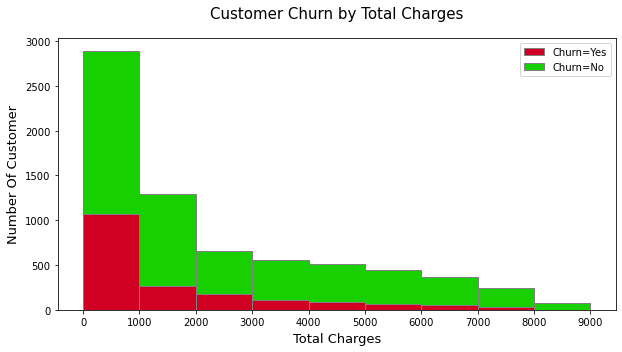

,1-1000,1001-2000,2001-3000,3001-4000,4001-5000,5001-6000,6001-7000,7001-8000,8001-9000
churn_no,1823,1025,471,448,427,372,309,219,75
churn_yes,1070,269,180,107,86,68,55,30,3
total_cust,2893,1294,651,555,513,440,364,249,78
point_difference,753,756,291,341,341,304,254,189,72
churn_no_perc,35%,20%,9%,9%,8%,7%,6%,4%,1%
churn_yes_perc,57%,14%,10%,6%,5%,4%,3%,2%,0%


In [32]:
#Histogram
with sns.color_palette(['#cf0022', '#18cf00']):
    fig, ax = plt.subplots(figsize=(10,5))
    counts, bins, patches = ax.hist([tcc_y, tcc_n], bins=range(0, 9001, 1000), edgecolor='gray', stacked=True)
    ax.set_xticks(bins)
    plt.xlabel('Total Charges', size=13, labelpad=5)
    plt.ylabel('Number Of Customer', size=13, labelpad=5)
    plt.title('Customer Churn by Total Charges', size=15, y=1.05)
    plt.legend(['Churn=Yes','Churn=No'])

plt.show()



#Table
tcc_y0 = tcc_y.replace(range(0, 1001), '1-1000').replace(range(1001, 2000), '1001-2000').replace(range(2001, 3000), '2001-3000').replace(range(3001, 4000), '3001-4000').replace(range(4001, 5000), '4001-5000').replace(range(5001, 6000), '5001-6000').replace(range(6001, 7000), '6001-7000').replace(range(7001, 8000), '7001-8000').replace(range(8001, 9000), '8001-9000')
tcc_n0 = tcc_n.replace(range(0, 1001), '1-1000').replace(range(1001, 2000), '1001-2000').replace(range(2001, 3000), '2001-3000').replace(range(3001, 4000), '3001-4000').replace(range(4001, 5000), '4001-5000').replace(range(5001, 6000), '5001-6000').replace(range(6001, 7000), '6001-7000').replace(range(7001, 8000), '7001-8000').replace(range(8001, 9000), '8001-9000')

tcc0 = pd.concat([tcc_y0, tcc_n0], axis=1)
tcc0.columns = ['churn_yes', 'churn_no']

tcc_index = ['1-1000', '1001-2000', '2001-3000', '3001-4000', '4001-5000', '5001-6000', '6001-7000', '7001-8000', '8001-9000']
tcc_y1 = tcc0['churn_yes'].value_counts().reindex(tcc_index).to_frame()
tcc_n1 = tcc0['churn_no'].value_counts().reindex(tcc_index).to_frame()

tcc_table = pd.concat([tcc_y1, tcc_n1], axis=1)
tcc_table['total_cust'] = (tcc_table['churn_yes'] + tcc_table['churn_no'])
tcc_table['point_difference'] = tcc_table['churn_no'] - tcc_table['churn_yes']
tcc_table['churn_no_perc'] = (tcc_table['churn_no']  / tcc_table['churn_no'].sum())
tcc_table['churn_no_perc'] = tcc_table['churn_no_perc'].map("{:.0%}".format)
tcc_table['churn_yes_perc'] = (tcc_table['churn_yes']  / tcc_table['churn_yes'].sum())
tcc_table['churn_yes_perc'] = tcc_table['churn_yes_perc'].map("{:.0%}".format)

tcc_table_index = ['churn_no', 'churn_yes', 'total_cust', 'point_difference', 'churn_no_perc', 'churn_yes_perc']
tcc_table = tcc_table.transpose().reindex(tcc_table_index)

display(tcc_table)

In [33]:
#summary
print('- Highest customer on 1-1,000 total charges ({} of {} customers, {:.1%} of total customer)'.format(tcc_table.loc['total_cust', '1-1000'], tcc_table.loc['total_cust'].sum(), tcc_table.loc['total_cust', '1-1000'] / tcc_table.loc['total_cust'].sum()))

print('\n- Lowest customer on 8,001-9,000 monthly charges ({} of {} customers, {:.1%} of total customer)'.format(tcc_table.loc['total_cust', '8001-9000'], tcc_table.loc['total_cust'].sum(), tcc_table.loc['total_cust', '8001-9000'] / tcc_table.loc['total_cust'].sum()))

print('\n- Highest customer did churn on 1-1,000 total charges ({} of {} customers, {:.1%} of total customer did churn)'.format(tcc_table.loc['churn_yes', '1-1000'], tcc_table.loc['churn_yes'].sum(), tcc_table.loc['churn_yes', '1-1000'] / tcc_table.loc['churn_yes'].sum()))

print('\n- Highest customer did not churn on 1-1,000 total charges ({} of {} customers, {:.1%} of total customer did not churn)'.format(tcc_table.loc['churn_no', '1-1000'], tcc_table.loc['churn_no'].sum(), tcc_table.loc['churn_no', '1-1000'] / tcc_table.loc['churn_no'].sum()))

print('\n- The customer did churn average is on 1-1,000 total charges ({:.1f}) while median is on 1-1,000 total charges ({:.1f}).'.format(tcc_y.mean(), tcc_y.median()))

print('\n- The customer did not churn average is on 2,001-3,000 total charges ({:.1f}) while median is on is on 1,001-2,000 total charges ({:.1f}).'.format(tcc_n.mean(), tcc_n.median()))

- Highest customer on 1-1,000 total charges (2893 of 7037 customers, 41.1% of total customer)

- Lowest customer on 8,001-9,000 monthly charges (78 of 7037 customers, 1.1% of total customer)

- Highest customer did churn on 1-1,000 total charges (1070 of 1868 customers, 57.3% of total customer did churn)

- Highest customer did not churn on 1-1,000 total charges (1823 of 5169 customers, 35.3% of total customer did not churn)

- The customer did churn average is on 1-1,000 total charges (1531.8) while median is on 1-1,000 total charges (704.0).

- The customer did not churn average is on 2,001-3,000 total charges (2552.9) while median is on is on 1,001-2,000 total charges (1679.5).


### <a id='2-4'>2.4 Categorical feature</a>

#### <a id='2-4-1'>2.4.1 Gender (Binary Feature)</a>

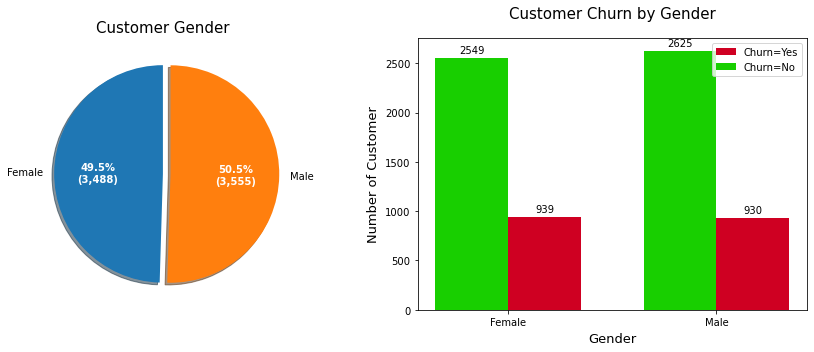


- Customer Gender barely equal and most customer did not churn


In [34]:
#define the data
g_l = df1['gender'].unique().sort_values(ascending=False).sort_values()
g_vc = df1['gender'].value_counts().sort_index()
gc_y_l = df1[df1.Churn=='Yes'].gender.value_counts().sort_index()
gc_n_l = df1[df1.Churn=='No'].gender.value_counts().sort_index()

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

#pie chart
explode = (0, 0.07)

def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:,})".format(pct, absolute)

wedges, texts, autotexts = ax[0].pie(g_vc, explode=explode, labels=g_l, autopct=lambda pct: func(pct, g_vc), shadow=True, startangle=90)

plt.setp(autotexts, size=10, weight="bold", color="white")

ax[0].set_title("Customer Gender", size=15)


#bar chart
g_l_l = np.arange(len(g_l))  # the label locations
g_width = 0.35  # the width of the bars

gc_y_r = ax[1].bar(g_l_l + g_width/2, gc_y_l, g_width, label='Churn=Yes', color='#cf0022')
gc_n_r = ax[1].bar(g_l_l - g_width/2, gc_n_l, g_width, label='Churn=No', color='#18cf00')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[1].set_xlabel('Gender', size=13, labelpad=5)
ax[1].set_ylabel('Number of Customer', size=13, labelpad=5)
ax[1].set_title('Customer Churn by Gender', size=15, y=1.05)
ax[1].set_xticks(g_l_l)
ax[1].set_xticklabels(g_l)
ax[1].legend()

ax[1].bar_label(gc_y_r, padding=3)
ax[1].bar_label(gc_n_r, padding=3)

fig.tight_layout()

plt.show()


#Summary
print('\n- Customer Gender barely equal and most customer did not churn')

#### <a id='2-4-2'>2.4.2 SeniorCitizen (Binary Feature)</a>

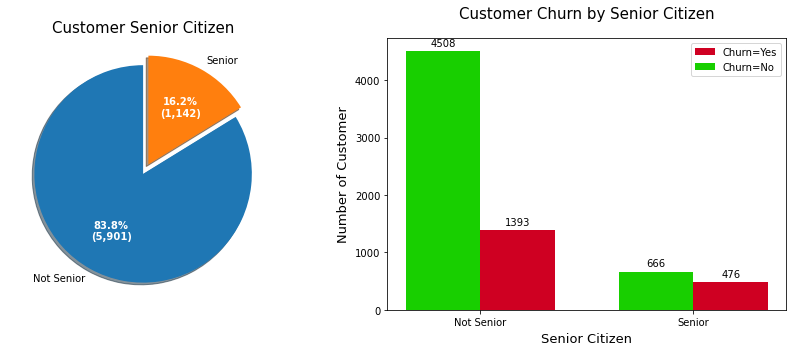


- Customers are dominantly not senior. There are not senior customers whom did not churn have created big gap than those who did.
- Senior Customers who did not churn slightly bigger than those who did.


In [35]:
#define the data
sc_l = df1['SeniorCitizen'].unique().replace(0, "Not Senior").replace(1, "Senior").sort_values()
sc_vc = df1['SeniorCitizen'].value_counts().sort_index()
scc_y_l = df1[df1.Churn=='Yes'].SeniorCitizen.value_counts().sort_index()
scc_n_l = df1[df1.Churn=='No'].SeniorCitizen.value_counts().sort_index()

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

#pie chart
explode = (0, 0.1)

def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:,})".format(pct, absolute)

wedges, texts, autotexts = ax[0].pie(sc_vc, explode=explode, labels=sc_l, autopct=lambda pct: func(pct, sc_vc), shadow=True, startangle=90)

plt.setp(autotexts, size=10, weight="bold", color="white")

ax[0].set_title("Customer Senior Citizen", size=15)


#bar chart
sc_l_l = np.arange(len(sc_l))  # the label locations
sc_width = 0.35  # the width of the bars

scc_y_r = ax[1].bar(sc_l_l + sc_width/2, scc_y_l, sc_width, label='Churn=Yes', color='#cf0022')
scc_n_r = ax[1].bar(sc_l_l - sc_width/2, scc_n_l, sc_width, label='Churn=No', color='#18cf00')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[1].set_xlabel('Senior Citizen', size=13, labelpad=5)
ax[1].set_ylabel('Number of Customer', size=13, labelpad=5)
ax[1].set_title('Customer Churn by Senior Citizen', size=15, y=1.05)
ax[1].set_xticks(sc_l_l)
ax[1].set_xticklabels(sc_l)
ax[1].legend()

ax[1].bar_label(scc_y_r, padding=3)
ax[1].bar_label(scc_n_r, padding=3)

fig.tight_layout()

plt.show()


#Summary
print('\n- Customers are dominantly not senior. There are not senior customers whom did not churn have created big gap than those who did.\n- Senior Customers who did not churn slightly bigger than those who did.')

#### <a id='2-4-3'>2.4.3 Partner (Binary Feature)</a>

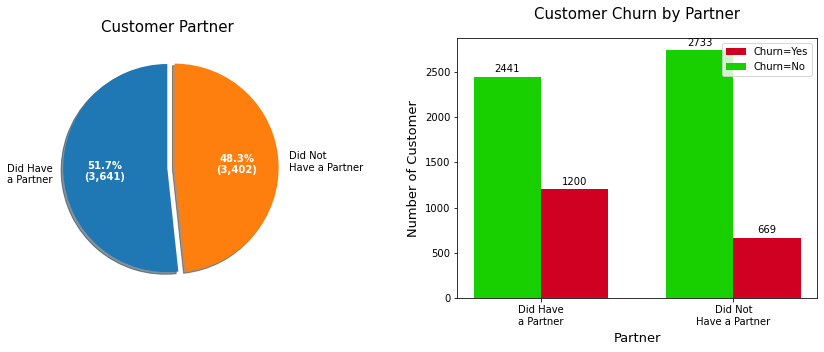


- Customers who did not have a partner sligthy bigger than those who did.
- Most customers did not churn.


In [36]:
#define the data
p_l = df1['Partner'].unique().replace("No", "Did Not\nHave a Partner").replace("Yes", "Did Have\na Partner").sort_values(ascending=False)
p_vc = df1['Partner'].value_counts().sort_index()
pc_y_l = df1[df1.Churn=='Yes'].Partner.value_counts().sort_index()
pc_n_l = df1[df1.Churn=='No'].Partner.value_counts().sort_index()

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

#pie chart
explode = (0, 0.07)

def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:,})".format(pct, absolute)

wedges, texts, autotexts = ax[0].pie(p_vc, explode=explode, labels=p_l, autopct=lambda pct: func(pct, p_vc), shadow=True, startangle=90)

plt.setp(autotexts, size=10, weight="bold", color="white")

ax[0].set_title("Customer Partner", size=15)


#bar chart
p_l_l = np.arange(len(p_l))  # the label locations
p_width = 0.35  # the width of the bars

pc_y_r = ax[1].bar(p_l_l + p_width/2, pc_y_l, p_width, label='Churn=Yes', color='#cf0022')
pc_n_r = ax[1].bar(p_l_l - p_width/2, pc_n_l, p_width, label='Churn=No', color='#18cf00')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[1].set_xlabel('Partner', size=13, labelpad=5)
ax[1].set_ylabel('Number of Customer', size=13, labelpad=5)
ax[1].set_title('Customer Churn by Partner', size=15, y=1.05)
ax[1].set_xticks(p_l_l)
ax[1].set_xticklabels(p_l)
ax[1].legend(loc=1)

ax[1].bar_label(pc_y_r, padding=3)
ax[1].bar_label(pc_n_r, padding=3)

fig.tight_layout()

plt.show()


#Summary
print('\n- Customers who did not have a partner sligthy bigger than those who did.\n- Most customers did not churn.')

#### <a id='2-4-4'>2.4.4 Dependents (Binary Feature)</a>

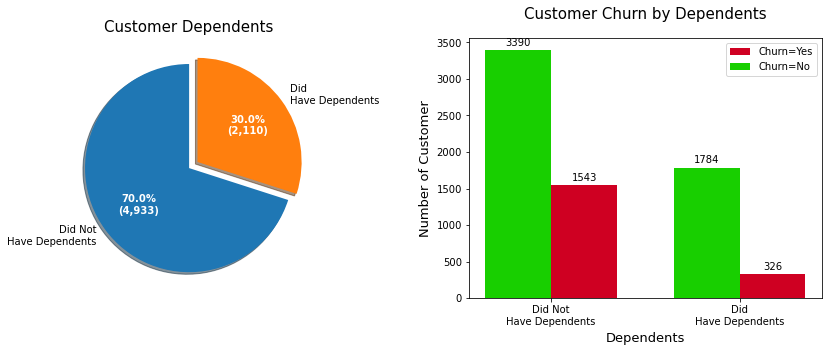


- Most customers did not have dependents.
- Customers who did not have dependents and did not churn took biggest portion. It is noticeable that customers did have dependents and churn are quite low.


In [37]:
#define the data
d_l = df1['Dependents'].unique().replace("No", "Did Not\nHave Dependents").replace("Yes", "Did\nHave Dependents").sort_values()
d_vc = df1['Dependents'].value_counts().sort_index()
dc_y_l = df1[df1.Churn=='Yes'].Dependents.value_counts().sort_index()
dc_n_l = df1[df1.Churn=='No'].Dependents.value_counts().sort_index()

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

#pie chart
explode = (0, 0.1)

def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:,})".format(pct, absolute)

wedges, texts, autotexts = ax[0].pie(d_vc, explode=explode, labels=d_l, autopct=lambda pct: func(pct, d_vc), shadow=True, startangle=90)

plt.setp(autotexts, size=10, weight="bold", color="white")

ax[0].set_title("Customer Dependents", size=15)


#bar chart
d_l_l = np.arange(len(d_l))  # the label locations
d_width = 0.35  # the width of the bars

dc_y_r = ax[1].bar(d_l_l + d_width/2, dc_y_l, d_width, label='Churn=Yes', color='#cf0022')
dc_n_r = ax[1].bar(d_l_l - d_width/2, dc_n_l, d_width, label='Churn=No', color='#18cf00')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[1].set_xlabel('Dependents', size=13, labelpad=5)
ax[1].set_ylabel('Number of Customer', size=13, labelpad=5)
ax[1].set_title('Customer Churn by Dependents', size=15, y=1.05)
ax[1].set_xticks(d_l_l)
ax[1].set_xticklabels(d_l)
ax[1].legend()

ax[1].bar_label(dc_y_r, padding=3)
ax[1].bar_label(dc_n_r, padding=3)

fig.tight_layout()

plt.show()


#Summary
print('\n- Most customers did not have dependents.\n- Customers who did not have dependents and did not churn took biggest portion. It is noticeable that customers did have dependents and churn are quite low.')

#### <a id='2-4-5'>2.4.5 Phone Service (Binary Feature)</a>

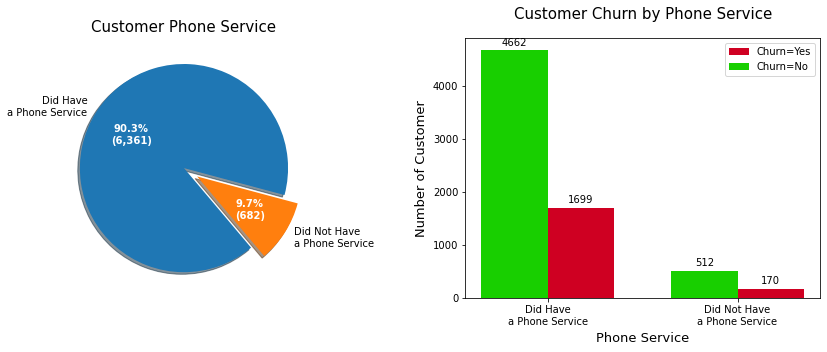


- More than 90% customers did have a phone service.
- Customers who did have a phone service and did not churn are almost third times as much as customers who did have a phone service but churn.
- Surprisingly, customers who did not have a phone service and not churn exactly third times as much as customers who did not have a phone service but churn


In [38]:
#define the data
ps_l = df1['PhoneService'].unique().replace("No", "Did Not Have\na Phone Service").replace("Yes", "Did Have\na Phone Service").sort_values(ascending=False)
ps_vc = df1['PhoneService'].value_counts().sort_index(ascending=False)
psc_y_l = df1[df1.Churn=='Yes'].PhoneService.value_counts().sort_index(ascending=False)
psc_n_l = df1[df1.Churn=='No'].PhoneService.value_counts().sort_index(ascending=False)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

#pie chart
explode = (0, 0.15)

def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:,})".format(pct, absolute)

wedges, texts, autotexts = ax[0].pie(ps_vc, explode=explode, labels=ps_l, autopct=lambda pct: func(pct, ps_vc), shadow=True, startangle=-15)

plt.setp(autotexts, size=10, weight="bold", color="white")

ax[0].set_title("Customer Phone Service", size=15)


#bar chart
ps_l_l = np.arange(len(ps_l))  # the label locations
ps_width = 0.35  # the width of the bars

psc_y_r = ax[1].bar(ps_l_l + ps_width/2, psc_y_l, ps_width, label='Churn=Yes', color='#cf0022')
psc_n_r = ax[1].bar(ps_l_l - ps_width/2, psc_n_l, ps_width, label='Churn=No', color='#18cf00')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[1].set_xlabel('Phone Service', size=13, labelpad=5)
ax[1].set_ylabel('Number of Customer', size=13, labelpad=5)
ax[1].set_title('Customer Churn by Phone Service', size=15, y=1.05)
ax[1].set_xticks(ps_l_l)
ax[1].set_xticklabels(ps_l)
ax[1].legend()

ax[1].bar_label(psc_y_r, padding=3)
ax[1].bar_label(psc_n_r, padding=3)

fig.tight_layout()

plt.show()


#Summary
print('\n- More than 90% customers did have a phone service.\n- Customers who did have a phone service and did not churn are almost third times as much as customers who did have a phone service but churn.\n- Surprisingly, customers who did not have a phone service and not churn exactly third times as much as customers who did not have a phone service but churn')

#### <a id='2-4-6'>2.4.6 Multiple Lines (Binary Feature)</a>

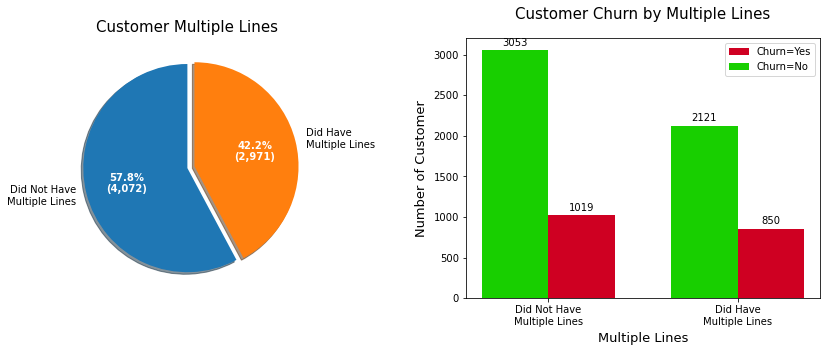


- Customers who did not have multiple lines are slightly bigger than whom who did.
- Customers who did not have multiple lines and not churn are almost third times as much as customers who did not have multiple lines but churn.
- While customers who did have multiple lines and not churn are more than twice as much as customers who did have multiple lines but churn


In [39]:
#define the data
ml_l = df1['MultipleLines'].unique().replace("No", "Did Not Have\nMultiple Lines").replace("Yes", "Did Have\nMultiple Lines").sort_values()
ml_vc = df1['MultipleLines'].value_counts().sort_index()
mlc_y_l = df1[df1.Churn=='Yes'].MultipleLines.value_counts().sort_index()
mlc_n_l = df1[df1.Churn=='No'].MultipleLines.value_counts().sort_index()

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

#pie chart
explode = (0, 0.07)

def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:,})".format(pct, absolute)

wedges, texts, autotexts = ax[0].pie(ml_vc, explode=explode, labels=ml_l, autopct=lambda pct: func(pct, ml_vc), shadow=True, startangle=90)

plt.setp(autotexts, size=10, weight="bold", color="white")

ax[0].set_title("Customer Multiple Lines", size=15)


#bar chart
ml_l_l = np.arange(len(ml_l))  # the label locations
ml_width = 0.35  # the width of the bars

mlc_y_r = ax[1].bar(ml_l_l + ml_width/2, mlc_y_l, ml_width, label='Churn=Yes', color='#cf0022')
mlc_n_r = ax[1].bar(ml_l_l - ml_width/2, mlc_n_l, ml_width, label='Churn=No', color='#18cf00')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[1].set_xlabel('Multiple Lines', size=13, labelpad=5)
ax[1].set_ylabel('Number of Customer', size=13, labelpad=5)
ax[1].set_title('Customer Churn by Multiple Lines', size=15, y=1.05)
ax[1].set_xticks(ml_l_l)
ax[1].set_xticklabels(ml_l)
ax[1].legend()

ax[1].bar_label(mlc_y_r, padding=3)
ax[1].bar_label(mlc_n_r, padding=3)

fig.tight_layout()

plt.show()


#Summary
print('\n- Customers who did not have multiple lines are slightly bigger than whom who did.\n- Customers who did not have multiple lines and not churn are almost third times as much as customers who did not have multiple lines but churn.\n- While customers who did have multiple lines and not churn are more than twice as much as customers who did have multiple lines but churn')

#### <a id='2-4-7'>2.4.7 Internet Service (Nominal Feature)</a>

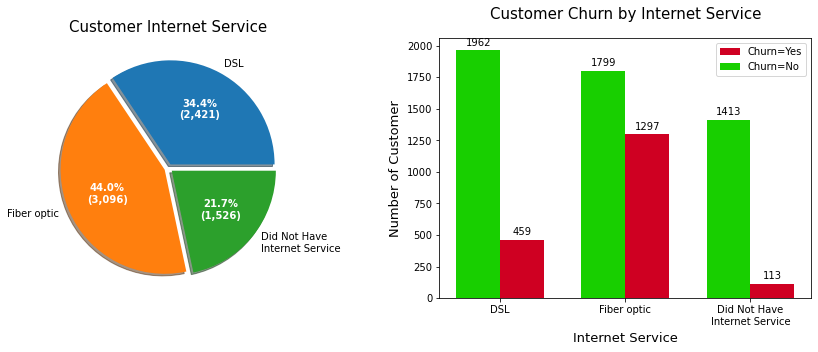


- Most customers did have fiber optic and least customers did not have internet service at all.
- Customers who did have DSL and not churn took the highest portion while customer who did not have internet service and churn took the lowest one.


In [40]:
#define the data
is_l = df1['InternetService'].unique().replace("No", "Did Not Have\nInternet Service").sort_values()
is_vc = df1['InternetService'].value_counts().sort_index()
isc_y_l = df1[df1.Churn=='Yes'].InternetService.value_counts().sort_index()
isc_n_l = df1[df1.Churn=='No'].InternetService.value_counts().sort_index()

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

#pie chart
explode = (0.04, 0.04, 0.04)

def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:,})".format(pct, absolute)

wedges, texts, autotexts = ax[0].pie(is_vc, explode=explode, labels=is_l, autopct=lambda pct: func(pct, is_vc), shadow=True, startangle=0)

plt.setp(autotexts, size=10, weight="bold", color="white")

ax[0].set_title("Customer Internet Service", size=15)


#bar chart
is_l_l = np.arange(len(is_l))  # the label locations
is_width = 0.35  # the width of the bars

isc_y_r = ax[1].bar(is_l_l + is_width/2, isc_y_l, is_width, label='Churn=Yes', color='#cf0022')
isc_n_r = ax[1].bar(is_l_l - is_width/2, isc_n_l, is_width, label='Churn=No', color='#18cf00')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[1].set_xlabel('Internet Service', size=13, labelpad=5)
ax[1].set_ylabel('Number of Customer', size=13, labelpad=5)
ax[1].set_title('Customer Churn by Internet Service', size=15, y=1.05)
ax[1].set_xticks(is_l_l)
ax[1].set_xticklabels(is_l)
ax[1].legend()

ax[1].bar_label(isc_y_r, padding=3)
ax[1].bar_label(isc_n_r, padding=3)

fig.tight_layout()

plt.show()


#Summary
print('\n- Most customers did have fiber optic and least customers did not have internet service at all.\n- Customers who did have DSL and not churn took the highest portion while customer who did not have internet service and churn took the lowest one.')

#### <a id='2-4-8'>2.4.8 Online Security (Binary Feature)</a>

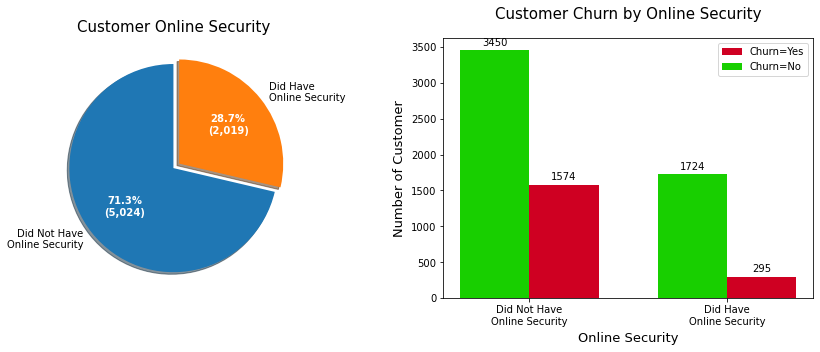


- Almost 3/4 of customers did not have online security.
- Customers who did not have online security and not churn are more than twice as much as those who did churn.
- Meanwhile customers who did have online security and not churn had huge distant with those who did churn.


In [41]:
#define the data
os_l = df1['OnlineSecurity'].unique().replace("No", "Did Not Have\nOnline Security").replace("Yes", "Did Have\nOnline Security").sort_values()
os_vc = df1['OnlineSecurity'].value_counts().sort_index()
osc_y_l = df1[df1.Churn=='Yes'].OnlineSecurity.value_counts().sort_index()
osc_n_l = df1[df1.Churn=='No'].OnlineSecurity.value_counts().sort_index()

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

#pie chart
explode = (0, 0.07)

def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:,})".format(pct, absolute)

wedges, texts, autotexts = ax[0].pie(os_vc, explode=explode, labels=os_l, autopct=lambda pct: func(pct, os_vc), shadow=True, startangle=90)

plt.setp(autotexts, size=10, weight="bold", color="white")

ax[0].set_title("Customer Online Security", size=15)


#bar chart
os_l_l = np.arange(len(os_l))  # the label locations
os_width = 0.35  # the width of the bars

osc_y_r = ax[1].bar(os_l_l + os_width/2, osc_y_l, os_width, label='Churn=Yes', color='#cf0022')
osc_n_r = ax[1].bar(os_l_l - os_width/2, osc_n_l, os_width, label='Churn=No', color='#18cf00')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[1].set_xlabel('Online Security', size=13, labelpad=5)
ax[1].set_ylabel('Number of Customer', size=13, labelpad=5)
ax[1].set_title('Customer Churn by Online Security', size=15, y=1.05)
ax[1].set_xticks(os_l_l)
ax[1].set_xticklabels(os_l)
ax[1].legend()

ax[1].bar_label(osc_y_r, padding=3)
ax[1].bar_label(osc_n_r, padding=3)

fig.tight_layout()

plt.show()


#Summary
print('\n- Almost 3/4 of customers did not have online security.\n- Customers who did not have online security and not churn are more than twice as much as those who did churn.\n- Meanwhile customers who did have online security and not churn had huge distant with those who did churn.')

#### <a id='2-4-9'>2.4.9 Online Backup (Binary Feature)</a>

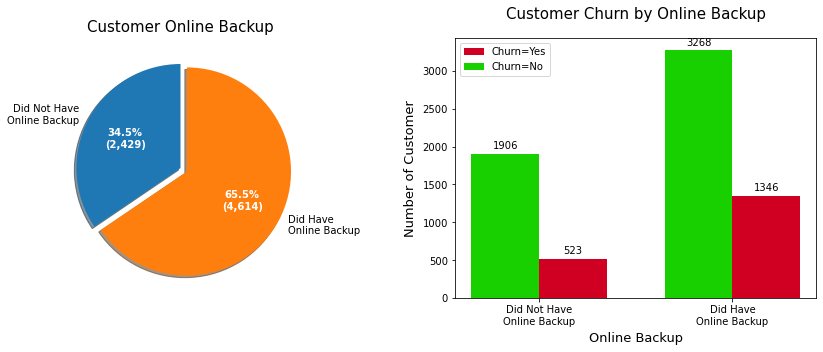


- Customers who did not have online backup are bigger than those who did.
- Meanwhile customers who did not have online backup and not churn had biggest portion.


In [42]:
#define the data
ob_l = df1['OnlineBackup'].unique().replace("No", "Did Not Have\nOnline Backup").replace("Yes", "Did Have\nOnline Backup").sort_values()
ob_vc = df1['OnlineBackup'].value_counts().sort_index(ascending=False)
obc_y_l = df1[df1.Churn=='Yes'].OnlineBackup.value_counts().sort_index(ascending=False)
obc_n_l = df1[df1.Churn=='No'].OnlineBackup.value_counts().sort_index(ascending=False)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

#pie chart
explode = (0, 0.07)

def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:,})".format(pct, absolute)

wedges, texts, autotexts = ax[0].pie(ob_vc, explode=explode, labels=ob_l, autopct=lambda pct: func(pct, ob_vc), shadow=True, startangle=90)

plt.setp(autotexts, size=10, weight="bold", color="white")

ax[0].set_title("Customer Online Backup", size=15)


#bar chart
ob_l_l = np.arange(len(ob_l))  # the label locations
ob_width = 0.35  # the width of the bars

obc_y_r = ax[1].bar(ob_l_l + ob_width/2, obc_y_l, ob_width, label='Churn=Yes', color='#cf0022')
obc_n_r = ax[1].bar(ob_l_l - ob_width/2, obc_n_l, ob_width, label='Churn=No', color='#18cf00')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[1].set_xlabel('Online Backup', size=13, labelpad=5)
ax[1].set_ylabel('Number of Customer', size=13, labelpad=5)
ax[1].set_title('Customer Churn by Online Backup', size=15, y=1.05)
ax[1].set_xticks(ob_l_l)
ax[1].set_xticklabels(ob_l)
ax[1].legend()

ax[1].bar_label(obc_y_r, padding=3)
ax[1].bar_label(obc_n_r, padding=3)

fig.tight_layout()

plt.show()


#Summary
print('\n- Customers who did not have online backup are bigger than those who did.\n- Meanwhile customers who did not have online backup and not churn had biggest portion.')

#### <a id='2-4-10'>2.4.10 Device Protection (Binary Feature)</a>

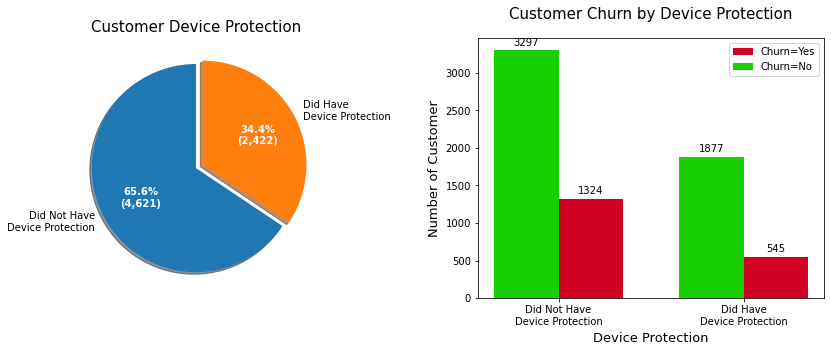


- Customers who did not have device protection are bigger than those who did.
- Meanwhile customers who did not have device protection and not churn had biggest portion.


In [43]:
#define the data
dp_l = df1['DeviceProtection'].unique().replace("No", "Did Not Have\nDevice Protection").replace("Yes", "Did Have\nDevice Protection").sort_values()
dp_vc = df1['DeviceProtection'].value_counts().sort_index()
dpc_y_l = df1[df1.Churn=='Yes'].DeviceProtection.value_counts().sort_index()
dpc_n_l = df1[df1.Churn=='No'].DeviceProtection.value_counts().sort_index()

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

#pie chart
explode = (0, 0.07)

def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:,})".format(pct, absolute)

wedges, texts, autotexts = ax[0].pie(dp_vc, explode=explode, labels=dp_l, autopct=lambda pct: func(pct, dp_vc), shadow=True, startangle=90)

plt.setp(autotexts, size=10, weight="bold", color="white")

ax[0].set_title("Customer Device Protection", size=15)


#bar chart
dp_l_l = np.arange(len(dp_l))  # the label locations
dp_width = 0.35  # the width of the bars

dpc_y_r = ax[1].bar(dp_l_l + dp_width/2, dpc_y_l, dp_width, label='Churn=Yes', color='#cf0022')
dpc_n_r = ax[1].bar(dp_l_l - dp_width/2, dpc_n_l, dp_width, label='Churn=No', color='#18cf00')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[1].set_xlabel('Device Protection', size=13, labelpad=5)
ax[1].set_ylabel('Number of Customer', size=13, labelpad=5)
ax[1].set_title('Customer Churn by Device Protection', size=15, y=1.05)
ax[1].set_xticks(dp_l_l)
ax[1].set_xticklabels(dp_l)
ax[1].legend()

ax[1].bar_label(dpc_y_r, padding=3)
ax[1].bar_label(dpc_n_r, padding=3)

fig.tight_layout()

plt.show()


#Summary
print('\n- Customers who did not have device protection are bigger than those who did.\n- Meanwhile customers who did not have device protection and not churn had biggest portion.')

#### <a id='2-4-11'>2.4.11 Tech Support (Binary Feature)</a>

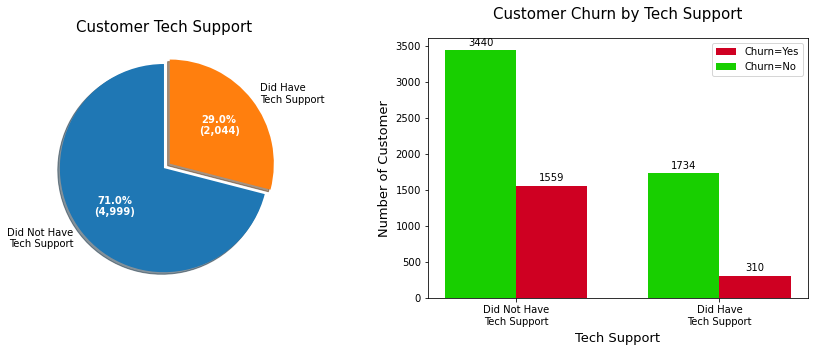


- There are more customers who did not have tech support than those who did.
- Meanwhile customers who did not have tech support and not churn had biggest portion.


In [44]:
#define the data
ts_l = df1['TechSupport'].unique().replace("No", "Did Not Have\nTech Support").replace("Yes", "Did Have\nTech Support").sort_values()
ts_vc = df1['TechSupport'].value_counts().sort_index()
tsc_y_l = df1[df1.Churn=='Yes'].TechSupport.value_counts().sort_index()
tsc_n_l = df1[df1.Churn=='No'].TechSupport.value_counts().sort_index()

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

#pie chart
explode = (0, 0.07)

def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:,})".format(pct, absolute)

wedges, texts, autotexts = ax[0].pie(ts_vc, explode=explode, labels=ts_l, autopct=lambda pct: func(pct, ts_vc), shadow=True, startangle=90)

plt.setp(autotexts, size=10, weight="bold", color="white")

ax[0].set_title("Customer Tech Support", size=15)


#bar chart
ts_l_l = np.arange(len(ts_l))  # the label locations
ts_width = 0.35  # the width of the bars

tsc_y_r = ax[1].bar(ts_l_l + ts_width/2, tsc_y_l, ts_width, label='Churn=Yes', color='#cf0022')
tsc_n_r = ax[1].bar(ts_l_l - ts_width/2, tsc_n_l, ts_width, label='Churn=No', color='#18cf00')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[1].set_xlabel('Tech Support', size=13, labelpad=5)
ax[1].set_ylabel('Number of Customer', size=13, labelpad=5)
ax[1].set_title('Customer Churn by Tech Support', size=15, y=1.05)
ax[1].set_xticks(ts_l_l)
ax[1].set_xticklabels(ts_l)
ax[1].legend()

ax[1].bar_label(tsc_y_r, padding=3)
ax[1].bar_label(tsc_n_r, padding=3)

fig.tight_layout()

plt.show()


#Summary
print('\n- There are more customers who did not have tech support than those who did.\n- Meanwhile customers who did not have tech support and not churn had biggest portion.')

#### <a id='2-4-12'>2.4.12 Streaming TV (Binary Feature)</a>

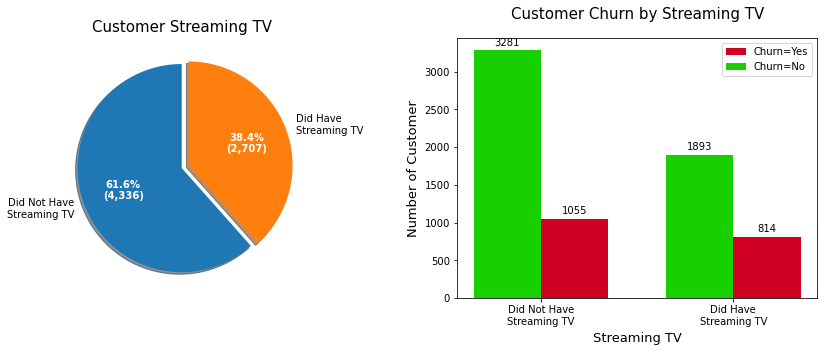


- There are more customers who did not have streaming TV than those who did.
- Meanwhile customers who did not have streaming TV and did not churn had biggest portion.


In [45]:
#define the data
st_l = df1['StreamingTV'].unique().replace("No", "Did Not Have\nStreaming TV").replace("Yes", "Did Have\nStreaming TV").sort_values()
st_vc = df1['StreamingTV'].value_counts().sort_index()
stc_y_l = df1[df1.Churn=='Yes'].StreamingTV.value_counts().sort_index()
stc_n_l = df1[df1.Churn=='No'].StreamingTV.value_counts().sort_index()

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

#pie chart
explode = (0, 0.07)

def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:,})".format(pct, absolute)

wedges, texst, autotexst = ax[0].pie(st_vc, explode=explode, labels=st_l, autopct=lambda pct: func(pct, st_vc), shadow=True, startangle=90)

plt.setp(autotexst, size=10, weight="bold", color="white")

ax[0].set_title("Customer Streaming TV", size=15)


#bar chart
st_l_l = np.arange(len(st_l))  # the label locations
st_width = 0.35  # the width of the bars

stc_y_r = ax[1].bar(st_l_l + st_width/2, stc_y_l, st_width, label='Churn=Yes', color='#cf0022')
stc_n_r = ax[1].bar(st_l_l - st_width/2, stc_n_l, st_width, label='Churn=No', color='#18cf00')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[1].set_xlabel('Streaming TV', size=13, labelpad=5)
ax[1].set_ylabel('Number of Customer', size=13, labelpad=5)
ax[1].set_title('Customer Churn by Streaming TV', size=15, y=1.05)
ax[1].set_xticks(st_l_l)
ax[1].set_xticklabels(st_l)
ax[1].legend()

ax[1].bar_label(stc_y_r, padding=3)
ax[1].bar_label(stc_n_r, padding=3)

fig.tight_layout()

plt.show()


#Summary
print('\n- There are more customers who did not have streaming TV than those who did.\n- Meanwhile customers who did not have streaming TV and did not churn had biggest portion.')

#### <a id='2-4-13'>2.4.13 Streaming Movies (Binary Feature)</a>

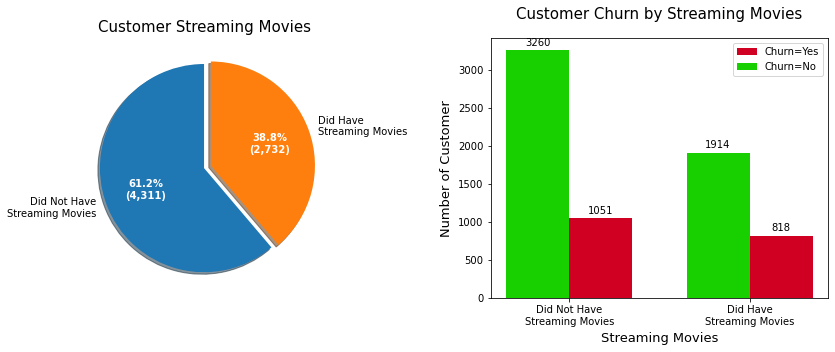


- There are more customers who did not have streaming movies than those who did.
- Meanwhile customers who did not have streaming movies and did not churn had biggest portion.


In [46]:
#define the data
sm_l = df1['StreamingMovies'].unique().replace("No", "Did Not Have\nStreaming Movies").replace("Yes", "Did Have\nStreaming Movies").sort_values()
sm_vc = df1['StreamingMovies'].value_counts().sort_index()
smc_y_l = df1[df1.Churn=='Yes'].StreamingMovies.value_counts().sort_index()
smc_n_l = df1[df1.Churn=='No'].StreamingMovies.value_counts().sort_index()

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

#pie chart
explode = (0, 0.07)

def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:,})".format(pct, absolute)

wedges, texsm, autotext = ax[0].pie(sm_vc, explode=explode, labels=sm_l, autopct=lambda pct: func(pct, sm_vc), shadow=True, startangle=90)

plt.setp(autotext, size=10, weight="bold", color="white")

ax[0].set_title("Customer Streaming Movies", size=15)


#bar chart
sm_l_l = np.arange(len(sm_l))  # the label locations
sm_width = 0.35  # the width of the bars

smc_y_r = ax[1].bar(sm_l_l + sm_width/2, smc_y_l, sm_width, label='Churn=Yes', color='#cf0022')
smc_n_r = ax[1].bar(sm_l_l - sm_width/2, smc_n_l, sm_width, label='Churn=No', color='#18cf00')

# Add some text for labels, title and cusmom x-axis tick labels, etc.
ax[1].set_xlabel('Streaming Movies', size=13, labelpad=5)
ax[1].set_ylabel('Number of Customer', size=13, labelpad=5)
ax[1].set_title('Customer Churn by Streaming Movies', size=15, y=1.05)
ax[1].set_xticks(sm_l_l)
ax[1].set_xticklabels(sm_l)
ax[1].legend()

ax[1].bar_label(smc_y_r, padding=3)
ax[1].bar_label(smc_n_r, padding=3)

fig.tight_layout()

plt.show()


#Summary
print('\n- There are more customers who did not have streaming movies than those who did.\n- Meanwhile customers who did not have streaming movies and did not churn had biggest portion.')

#### <a id='2-4-14'>2.4.14 Contract (Nominal Feature)</a>

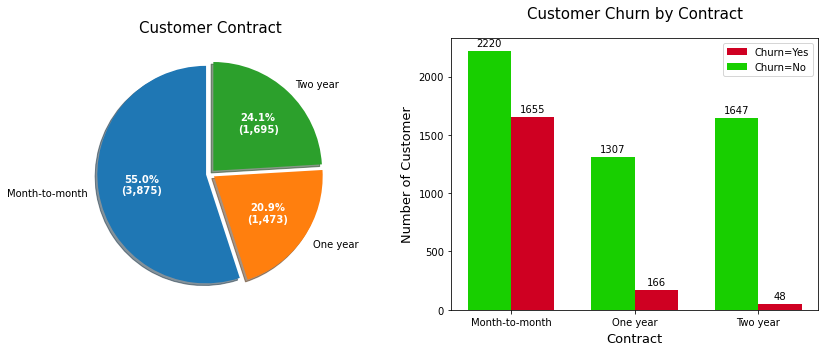


- Most customers did have month-to-month contract, followed by two years contract, and least customers did have one year customer.
- Customers who did have month-to-month contract and not churn took the biggest portion while customers who did have two years contract and churn took the lowest one.


In [47]:
#define the data
ct_l = df1['Contract'].unique().sort_values()
ct_vc = df1['Contract'].value_counts().sort_index()
ctc_y_l = df1[df1.Churn=='Yes'].Contract.value_counts().sort_index()
ctc_n_l = df1[df1.Churn=='No'].Contract.value_counts().sort_index()

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

#pie chart
explode = (0.04, 0.04, 0.04)

def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:,})".format(pct, absolute)

wedges, texts, autotexts = ax[0].pie(ct_vc, explode=explode, labels=ct_l, autopct=lambda pct: func(pct, ct_vc), shadow=True, startangle=90)

plt.setp(autotexts, size=10, weight="bold", color="white")

ax[0].set_title("Customer Contract", size=15)


#bar chart
ct_l_l = np.arange(len(ct_l))  # the label locations
ct_width = 0.35  # the width of the bars

ctc_y_r = ax[1].bar(ct_l_l + ct_width/2, ctc_y_l, ct_width, label='Churn=Yes', color='#cf0022')
ctc_n_r = ax[1].bar(ct_l_l - ct_width/2, ctc_n_l, ct_width, label='Churn=No', color='#18cf00')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[1].set_xlabel('Contract', size=13, labelpad=5)
ax[1].set_ylabel('Number of Customer', size=13, labelpad=5)
ax[1].set_title('Customer Churn by Contract', size=15, y=1.05)
ax[1].set_xticks(ct_l_l)
ax[1].set_xticklabels(ct_l)
ax[1].legend()

ax[1].bar_label(ctc_y_r, padding=3)
ax[1].bar_label(ctc_n_r, padding=3)

fig.tight_layout()

plt.show()


#Summary
print('\n- Most customers did have month-to-month contract, followed by two years contract, and least customers did have one year customer.\n- Customers who did have month-to-month contract and not churn took the biggest portion while customers who did have two years contract and churn took the lowest one.')

#### <a id='2-4-15'>2.4.15 Paperless Billing (Binary Feature)</a>

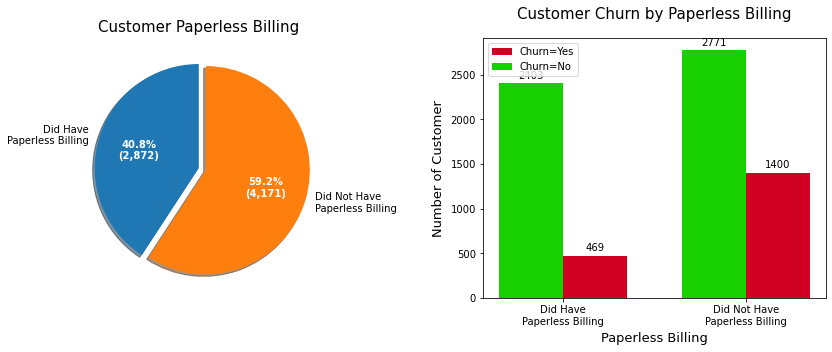


- There are more customers who did have paperless billing than those who did not.
- Meanwhile customers who did have paperless billing and did not churn had biggest portion.


In [48]:
#define the data
pb_l = df1['PaperlessBilling'].unique().replace("No", "Did Not Have\nPaperless Billing").replace("Yes", "Did Have\nPaperless Billing").sort_values(ascending=False)
pb_vc = df1['PaperlessBilling'].value_counts().sort_index()
pbc_y_l = df1[df1.Churn=='Yes'].PaperlessBilling.value_counts().sort_index()
pbc_n_l = df1[df1.Churn=='No'].PaperlessBilling.value_counts().sort_index()

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

#pie chart
explode = (0, 0.07)

def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:,})".format(pct, absolute)

wedges, texpb, autotext = ax[0].pie(pb_vc, explode=explode, labels=pb_l, autopct=lambda pct: func(pct, pb_vc), shadow=True, startangle=90)

plt.setp(autotext, size=10, weight="bold", color="white")

ax[0].set_title("Customer Paperless Billing", size=15)


#bar chart
pb_l_l = np.arange(len(pb_l))  # the label locations
pb_width = 0.35  # the width of the bars

pbc_y_r = ax[1].bar(pb_l_l + pb_width/2, pbc_y_l, pb_width, label='Churn=Yes', color='#cf0022')
pbc_n_r = ax[1].bar(pb_l_l - pb_width/2, pbc_n_l, pb_width, label='Churn=No', color='#18cf00')

# Add some text for labels, title and cupbom x-axis tick labels, etc.
ax[1].set_xlabel('Paperless Billing', size=13, labelpad=5)
ax[1].set_ylabel('Number of Customer', size=13, labelpad=5)
ax[1].set_title('Customer Churn by Paperless Billing', size=15, y=1.05)
ax[1].set_xticks(pb_l_l)
ax[1].set_xticklabels(pb_l)
ax[1].legend()

ax[1].bar_label(pbc_y_r, padding=3)
ax[1].bar_label(pbc_n_r, padding=3)

fig.tight_layout()

plt.show()


#Summary
print('\n- There are more customers who did have paperless billing than those who did not.\n- Meanwhile customers who did have paperless billing and did not churn had biggest portion.')

#### <a id='2-4-16'>2.4.16 Payment Method (Nominal Feature)</a>

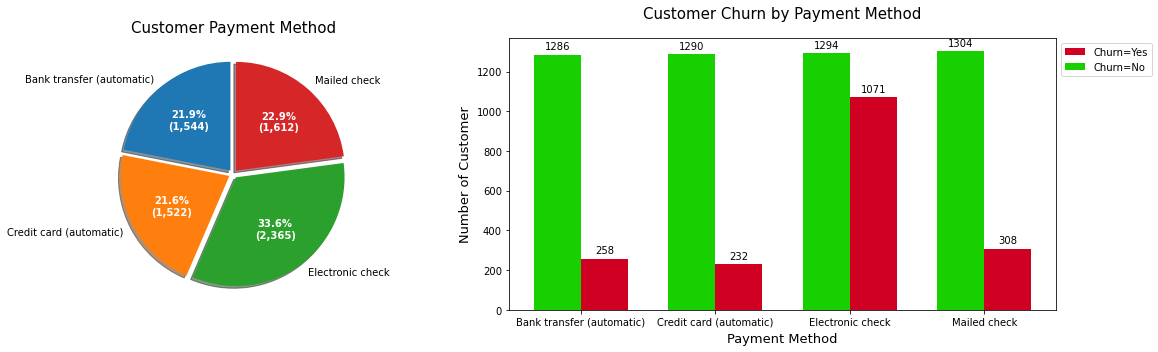


- Most customers did have electronic check as payment method, while the amount of each type of other method is almost equal.
- Interestingly, all methods which did not churn are almost equal.


In [49]:
#define the data
pb_l = ['Bank transfer (automatic)', 'Credit card (automatic)', 'Electronic check', 'Mailed check']
pb_vc = df1['PaymentMethod'].value_counts().sort_index()
pbc_y_l = df1[df1.Churn=='Yes'].PaymentMethod.value_counts().sort_index()
pbc_n_l = df1[df1.Churn=='No'].PaymentMethod.value_counts().sort_index()

fig, ax = plt.subplots(1, 2, figsize=(17, 5))

#pie chart
explode = (0.04, 0.04, 0.04, 0.04)

def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:,})".format(pct, absolute)

wedges, texts, autotexts = ax[0].pie(pb_vc, explode=explode, labels=pb_l, autopct=lambda pct: func(pct, pb_vc), shadow=True, startangle=90)

plt.setp(autotexts, size=10, weight="bold", color="white")

ax[0].set_title("Customer Payment Method", size=15)


#bar chart
pb_l_l = np.arange(len(pb_l))  # the label locations
pb_width = 0.35  # the width of the bars

pbc_y_r = ax[1].bar(pb_l_l + pb_width/2, pbc_y_l, pb_width, label='Churn=Yes', color='#cf0022')
pbc_n_r = ax[1].bar(pb_l_l - pb_width/2, pbc_n_l, pb_width, label='Churn=No', color='#18cf00')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[1].set_xlabel('Payment Method', size=13, labelpad=5)
ax[1].set_ylabel('Number of Customer', size=13, labelpad=5)
ax[1].set_title('Customer Churn by Payment Method', size=15, y=1.05)
ax[1].set_xticks(pb_l_l)
ax[1].set_xticklabels(pb_l)
ax[1].legend(bbox_to_anchor=(1, 1.0), loc=0)

ax[1].bar_label(pbc_y_r, padding=3)
ax[1].bar_label(pbc_n_r, padding=3)

fig.tight_layout()

plt.show()


#Summary
print('\n- Most customers did have electronic check as payment method, while the amount of each type of other method is almost equal.\n- Interestingly, all methods which did not churn are almost equal.')

# <a id='3'>3. Feature Engineering</a>

In [50]:
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [51]:
#Assign new dataframe for Data Pre-processing and Model
df2 = df.copy()

### <a href='#3-2'>3.2 Data Pre-processing</a>

#### <a id='3-2-2'>3.2.2 Data Cleaning</a>

In [52]:
# Converting Senior Citizen to a categorical data type.
df2['SeniorCitizen'] = df2['SeniorCitizen'].astype('category')

# Converting Total Charges to a numerical data type.
df2.TotalCharges = pd.to_numeric(df2.TotalCharges, errors='coerce')

In [53]:
# Drop Customer ID
df2 = df2.drop(['customerID'], axis=1, errors='ignore')

In [54]:
#Fix inconsistent data entry
df2.replace('No phone service', 'No', inplace=True)
df2.replace('No internet service', 'No', inplace=True)

### <a id='3-1'>3.1 Split Dataset</a>

In [55]:
# split into inputs and outputs
X, y = df2.drop(['Churn'], axis=1), df2['Churn']

In [56]:
X_train_full, X_test_full, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train_full.shape, X_test_full.shape

((4930, 19), (2113, 19))

In [57]:
# Split numerical and categorical features
numerical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]
categorical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['category', 'object', 'bool']]

# Keep selected columns only
my_cols = numerical_cols + categorical_cols
X_train = X_train_full[my_cols].copy()
X_test = X_test_full[my_cols].copy()

In [58]:
# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='constant')),
    ('scale', MinMaxScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# define the model
model = LogisticRegression()

In [59]:
# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
            

In [60]:
# Preprocessing of test data, get predictions
y_pred = my_pipeline.predict(X_test)

Text(0.5, 15.0, 'Predicted label')

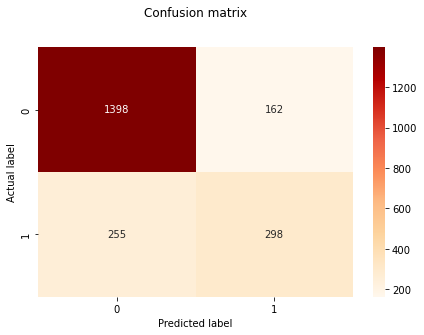

In [61]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap='OrRd', fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [62]:
print("Model parameters:",model.coef_)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, pos_label='Yes'))
print("Recall:",metrics.recall_score(y_test, y_pred, pos_label='Yes'))
print("F1 score:",metrics.f1_score(y_test, y_pred, pos_label='Yes'))

Model parameters: [[-3.04919335  0.34445714  0.95854143  0.03271136 -0.03280285 -0.12169856
   0.12160707 -0.0094319   0.00934041  0.11531553 -0.11540702  0.30831003
  -0.30840152 -0.1852923   0.18520081 -0.01610451  0.69134227 -0.67532925
   0.19527595 -0.19536744  0.13268541 -0.1327769  -0.00914754  0.00905605
   0.14936006 -0.14945155 -0.11517943  0.11508794 -0.07277484  0.07268335
   0.73663479 -0.07422194 -0.66250434 -0.16435058  0.16425908 -0.07973943
  -0.19217687  0.28876256 -0.01693774]]
Accuracy: 0.8026502602934217
Precision: 0.6478260869565218
Recall: 0.538878842676311
F1 score: 0.5883514313919053


AUC-ROC score: 0.8344670097834654


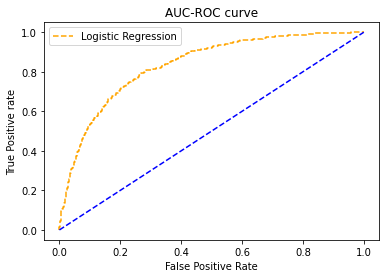

In [63]:
# predict probabilities
pred_prob = my_pipeline.predict_proba(X_test)

# roc curve for models
fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1], pos_label='Yes')

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label='Yes')

# auc scores
ra_score = roc_auc_score(y_test, pred_prob[:,1])

print("AUC-ROC score:", ra_score)

# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('AUC-ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

In [64]:
# if __name__ == "__main__":
#     # load the data from the file
#     data = df2

#     # X = feature values, all the columns except the last column
#     X = data.iloc[:, :-1]

#     # y = target values, last column of the data frame
#     y = data.iloc[:, -1]

#     # filter out the applicants that did churn
#     churn = data.loc[y == 'Yes']

#     # filter out the applicants that din't churn
#     not_churn = data.loc[y == 'No']

#     # plots
#     plt.scatter(churn.iloc[:, 0], churn.iloc[:, 1], s=10, label='churn')
#     plt.scatter(not_churn.iloc[:, 0], not_churn.iloc[:, 1], s=10, label='Not churn')
#     plt.legend()
#     plt.show()

In [65]:
# def cost_function(features, labels, weights):
#     '''
#     Using Mean Absolute Error

#     Features:(100,3)
#     Labels: (100,1)
#     Weights:(3,1)
#     Returns 1D matrix of predictions
#     Cost = (labels*log(predictions) + (1-labels)*log(1-predictions) ) / len(labels)
#     '''
#     observations = len(labels)

#     predictions = predict(features, weights)

#     #Take the error when label=Yes
#     class1_cost = -labels*np.log(predictions)

#     #Take the error when label=No
#     class2_cost = (1-labels)*np.log(1-predictions)

#     #Take the sum of both costs
#     cost = class1_cost - class2_cost

#     #Take the average cost
#     cost = cost.sum() / observations

#     return cost